## Multiple Linear Regression

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data

In [2]:
data=pd.read_excel('/Users/nickstatz/Desktop/CornYield/ALLDATA.xlsx')
data

,Year,Yield,GEOID,AWC Average,CEC Average,OCD Average,EVI Average,NDVI Average,GCI Average,NDWI Average,PPT Average,MaxT Average,MeanT Average,MinT Average,vpdMax Average,vpdMin Average
0,2010,130.0,5063,14.546161,19.094277,256.464574,0.351410,0.516680,2.728479,-0.076958,3.035817,26.840109,20.497388,14.155641,21.270887,2.055908
1,2010,150.0,5067,14.754726,19.042175,222.711286,0.340833,0.486366,2.523245,-0.055194,3.003970,26.779713,20.784387,14.790069,20.337962,1.731717
2,2010,130.0,5121,14.690079,19.121303,244.529345,0.348775,0.494331,2.662388,-0.051745,2.993533,26.222520,20.029503,13.837489,19.318879,1.254584
3,2010,166.0,5093,14.101840,20.899450,230.774988,0.333715,0.463979,2.525566,-0.065515,2.860128,27.062886,21.059436,15.056977,21.541121,2.095595
4,2010,143.0,5095,14.654235,20.037244,246.662318,0.367096,0.518080,2.834970,-0.051252,2.693002,27.435930,21.460487,15.486050,22.161051,2.167383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8859,2020,162.2,55117,16.245889,27.581528,404.975714,0.372817,0.553292,3.119724,0.002781,3.326646,17.271363,12.294380,7.317488,11.202002,0.819337
8860,2020,150.8,55139,15.951065,29.215066,407.824897,0.360200,0.540196,3.171092,-0.005588,3.081543,17.825263,12.678469,7.531764,12.746860,1.220882
8861,2020,125.3,55029,17.316416,24.363932,464.062694,0.372681,0.565959,3.166413,0.013161,3.263782,15.829407,11.318877,6.808435,9.801006,1.201919
8862,2020,155.1,55081,17.028700,25.753994,402.307727,0.410045,0.600312,3.785952,-0.000155,3.199670,17.723286,11.884950,6.046695,12.610834,0.686905


In [3]:
Soil=['AWC Average','CEC Average','OCD Average']
Sat=['EVI Average','NDVI Average','GCI Average','NDWI Average']
Clim=['PPT Average','MaxT Average','MeanT Average','MinT Average','vpdMax Average','vpdMin Average']


## Define x and y

In [4]:
x=data[Soil+Sat+Clim].values #Change Based on Desired Variables
y=data['Yield'].values

In [5]:
#Find first 2020 row: 7972
data.iloc[7971,:]

Year               2019.000000
Yield               156.800000
GEOID             55081.000000
AWC Average          16.742846
CEC Average          25.961521
OCD Average         393.139227
EVI Average           0.406946
NDVI Average          0.590073
GCI Average           3.638276
NDWI Average         -0.004499
PPT Average           3.737796
MaxT Average         16.304242
MeanT Average        10.890556
MinT Average          5.476921
vpdMax Average       12.610834
vpdMin Average        0.686905
Name: 7971, dtype: float64

In [6]:
x[7971]

array([ 1.67428465e+01,  2.59615210e+01,  3.93139227e+02,  4.06946228e-01,
        5.90072645e-01,  3.63827632e+00, -4.49862777e-03,  3.73779635e+00,
        1.63042417e+01,  1.08905556e+01,  5.47692145e+00,  1.26108343e+01,
        6.86904790e-01])

## Split Data Set in Training Set and Test Set

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=7971,random_state=0,shuffle=False) 
#Training size from finding start of 2020 data index

## Train the Model on the Training Set

In [8]:
from sklearn.linear_model import LinearRegression
ml=LinearRegression()
ml.fit(x_train,y_train)

LinearRegression()

## Predict Test Set Results

In [9]:
y_pred=ml.predict(x_test)
#print(y_pred)

In [10]:
ml.score(x_train,y_train)

0.7156559263516649

In [11]:
ml.score(x_test,y_test)

0.5559779932521847

## Evaluate Model

In [12]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
r2=r2_score(y_test,y_pred)
RMSE=mean_squared_error(y_test,y_pred,squared=False)
print('R2:',r2,' RMSE:',RMSE)

R2: 0.5559779932521847  RMSE: 20.927064234440746


## Plot Results

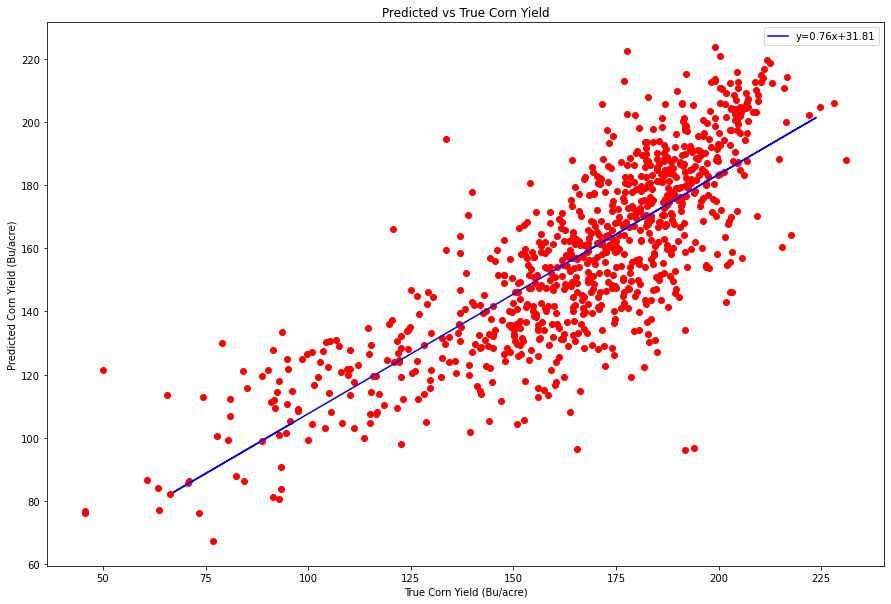

In [13]:
import matplotlib.pyplot as plt
from scipy import stats
plt.figure(figsize=(15,10))
slope, intercept, r_value, p_value, std_err = stats.linregress(y_test,y_pred)
line = slope*y_pred+intercept
plt.plot(y_pred, line, 'b', label='y={:.2f}x+{:.2f}'.format(slope,intercept))
plt.scatter(y_test,y_pred,color='r')
plt.title('Predicted vs True Corn Yield')
plt.xlabel('True Corn Yield (Bu/acre)')
plt.ylabel('Predicted Corn Yield (Bu/acre)')
plt.legend()
plt.show
plt.savefig("LinearSoil.jpeg")

## Predicted Values

In [14]:
#pred_y_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred, 'Difference':y_test-y_pred})
#pred_y_df[0:20]
#pred_y_df.to_excel('MultipleLinearRegressionDif.xlsx')